In [34]:
import pandas as pd
df=pd.read_csv('../dataset/covid_survey_sel_data_new.csv')
print(df.shape)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(5)

(249, 70)


,id,laundry detergent,Clove(lavang),Coriander seeds/Dhania,Garam/Goda masala,lemon,Milk,coffee,Sugar,Salt,...,Diarrhea,dry_mouth_com,Loss of appetite,difficult_breathing,no_chnage_in_taste,change_in_bitter,change_in_sweet,change_in_sour,change_in_salt,Diagnosed
0,18,75.0,72.0,66.000000,71.000000,77.0,70.0,71.0,69.0,63.0,...,0,0,0,0,1,0,0,0,0,Non-COVID
1,19,53.0,89.0,100.000000,71.000000,50.0,77.0,84.0,70.0,95.0,...,0,0,0,0,1,0,0,0,0,Non-COVID
2,20,80.0,100.0,100.000000,100.000000,99.0,100.0,100.0,83.0,74.0,...,0,0,0,0,1,0,0,0,0,Non-COVID
3,21,76.0,87.0,59.955823,65.345382,55.0,50.0,30.0,69.0,56.0,...,0,0,0,0,1,0,0,0,0,Non-COVID
4,22,75.0,88.0,96.000000,92.000000,68.0,27.0,79.0,69.0,85.0,...,0,0,0,0,1,0,0,0,0,Non-COVID


In [39]:
df1

,Unnamed: 0,filling_complete,id,submitted_at,submittor_id,Consent_given,area,comorbities,contacts,covid,...,smoking,symptoms,taste_changes,taste_irritants_label,taste_irritants_rating,taste_labels,taste_ratings,user_type,year_of_birth,zip
0,0,True,18,2020-08-25 08:29:43,-1,True,Haryana,[' Seasonal allergies/hay fever'],21-50,NaN,...,No,['Fever'],['None'],chili pepper (fresh / ground / dried),93.0,"['Sugar', 'Salt', 'lemon juice', 'black or gre...","[69, 63, 93, 69]",New,1992,160030.0
1,1,True,19,2020-08-25 11:08:29,-1,True,Chandigarh,"[' Smell disorder (e.g., hyposmia/anosmia)', '...",11-20,NaN,...,No,"['Changes in food flavor', 'Changes in smell',...",['None'],Black Pepper,100.0,"['Sugar', 'Salt', 'lemon juice', 'Fenugreek']","[70, 95, 100, 72]",New,1989,160030.0
2,2,True,20,2020-08-25 22:24:32,-1,True,Bengaluru,[],5-10,NaN,...,No,['No symptoms'],['None'],chili pepper (fresh / ground / dried),50.0,"['Sugar', 'Salt', 'Tamarind', 'Fenugreek']","[83, 74, 66, 71]",New,1993,560065.0
3,3,True,21,2020-08-26 22:48:36,6,True,Chandigarh,[],21-50,NaN,...,No,['Fever'],['None'],chili pepper (fresh / ground / dried),74.0,"['Sugar', 'Salt', 'NA', 'Coffee (beans, ground...","[69, 56, 'NA', 61]",New,1990,160055.0
4,4,True,22,2020-08-27 04:31:26,-1,True,Punjab,[' None'],none,NaN,...,No,['No symptoms'],['None'],chili pepper (fresh / ground / dried),94.0,"['Sugar', 'Salt', 'lemon juice', 'black or gre...","[69, 85, 89, 68]",New,1996,160055.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,244,True,278,2021-05-05 12:25:14,-1,True,"Patna, Bihar",[],11-20,Yes - diagnosed with viral swab,...,No,"['Fever', 'Dry cough']",['None'],chili pepper (fresh / ground / dried),97.0,"['Sugar', 'Salt', 'lemon juice', 'black or gre...","[98, 96, 97, 99]",New,1970,NaN
245,245,True,279,2021-05-05 23:08:31,-1,True,"Patliputra Colony, Patna, Bihar",[],21-50,Yes - diagnosed by medical symptoms only,...,No,['Fever'],['None'],chili pepper (fresh / ground / dried),100.0,"['Sugar', 'Salt', 'lemon juice', 'black or gre...","[100, 100, 100, 100]",New,1976,NaN
246,246,True,280,2021-05-05 23:11:52,-1,True,"Bikramganj, Rohtas, Bihar",[],5-10,Yes - diagnosed with viral swab,...,Yes - current smoker,"['Fever', 'Cough with mucus']",['None'],chili pepper (fresh / ground / dried),100.0,"['Sugar', 'Salt', 'lemon juice', 'black or gre...","[100, 100, 100, 100]",New,1942,NaN
247,247,True,282,2021-05-08 06:00:07,-1,True,Ludhiana,[' None'],none,Yes - diagnosed with another lab test,...,No,"['Fever', 'Dry cough', 'Difficulty breathing/s...","['Sweet', 'Sour', 'Salty', 'Bitter']",chili pepper (fresh / ground / dried),28.0,"['Sugar', 'Salt', 'lemon juice', 'black or gre...","[29, 0, 0, 19]",New,1993,142021.0


In [71]:
df1=pd.read_csv('../dataset/file_1.csv')
ids1=list(df1.id.values)
sub_ats=list(df1.submitted_at.values)
sub_ats=[int(datetime.strptime(sub_ats[i], '%Y-%m-%d %H:%M:%S').year) for i in range(len(sub_ats))]
yobs=list(df1.year_of_birth.values)
ages=[sub_ats[i]-yobs[i] for i in range(len(sub_ats))]
#yobs=[datetime.strptime(str(yobs[i]), '%Y-%m-%d %H:%M:%S') for i in range(len(yobs))]
ids=list(df.id.values)
df['age']=ages
print(ages)

[28, 31, 27, 30, 24, 23, 34, 30, 32, 18, 36, 27, 30, 31, 63, 59, 28, 38, 28, 44, 35, 33, 46, 18, 31, 27, 27, 42, 28, 18, 40, 26, 50, 35, 28, 34, 26, 65, 31, 28, 37, 34, 23, 36, 36, 27, 38, 70, 23, 40, 35, 23, 33, 40, 27, 38, 62, 62, 23, 28, 30, 26, 32, 32, 28, 28, 28, 28, 33, 30, 58, 31, 27, 23, 35, 28, 26, 23, 26, 25, 24, 24, 29, 30, 31, 26, 41, 31, 32, 25, 32, 23, 40, 28, 31, 26, 42, 40, 52, 27, 23, 29, 57, 20, 24, 30, 30, 38, 58, 39, 25, 46, 49, 28, 35, 28, 48, 23, 33, 21, 34, 27, 46, 41, 27, 38, 38, 24, 24, 47, 31, 28, 28, 27, 31, 32, 40, 45, 44, 48, 20, 40, 39, 31, 38, 38, 32, 46, 35, 31, 29, 37, 27, 36, 28, 63, 59, 26, 51, 42, 38, 74, 33, 24, 46, 56, 43, 39, 39, 45, 44, 45, 29, 27, 25, 40, 23, 63, 70, 43, 23, 31, 35, 26, 30, 30, 30, 45, 34, 38, 42, 33, 51, 30, 29, 46, 32, 67, 34, 39, 23, 32, 36, 53, 42, 46, 53, 65, 50, 60, 44, 41, 55, 45, 35, 48, 80, 21, 72, 39, 37, 30, 53, 71, 41, 51, 31, 33, 47, 60, 49, 37, 31, 22, 72, 28, 60, 34, 65, 39, 20, 18, 36, 41, 51, 45, 79, 28, 31]


In [72]:
set(df1['covid']. values)

{' No - not diagnosed, but have symptoms',
 ' Unknown - I was tested but did not get my results',
 ' Yes - diagnosed with another lab test',
 ' Yes - diagnosed with viral swab',
 'No - do not have any symptoms',
 'Yes - diagnosed by medical symptoms only',
 nan}

In [73]:
df1['covid']=df1['covid'].replace(' Yes - diagnosed with viral swab', 'COVID')
df1['covid'] = df1['covid'].replace('Yes - diagnosed by medical symptoms only', 'COVID', regex = True)
df1['covid']=df1['covid'].replace(' Unknown - I was tested but did not get my result', 2, regex = True)
df1['covid']=df1['covid'].replace( ' No - not diagnosed, but have symptoms', 'Non-COVID', regex = True)
df1['covid']=df1['covid'].replace('No - do not have any symptoms', 'Non-COVID', regex = True)
df1['covid']=df1['covid'].replace(' Yes - diagnosed with another lab test', 'COVID', regex = True)
df1['covid'] = df1['covid'].fillna('Non-COVID')
covids=list(df1.covid.values)
print(covids.count('COVID'),covids.count('Non-COVID'))

108 139


In [77]:
#df['Diagnosed']=covids
df.to_csv('../dataset/covid_survey_data_new1.csv')

In [76]:
df.drop(df[df['Diagnosed']==2].index, inplace = True)
df

,id,laundry detergent,Clove(lavang),Coriander seeds/Dhania,Garam/Goda masala,lemon,Milk,coffee,Sugar,Salt,...,dry_mouth_com,Loss of appetite,difficult_breathing,no_chnage_in_taste,change_in_bitter,change_in_sweet,change_in_sour,change_in_salt,Diagnosed,age
0,18,75.000000,72.000000,66.000000,71.000000,77.000000,70.000000,71.000000,69.0,63.000000,...,0,0,0,1,0,0,0,0,Non-COVID,28
1,19,53.000000,89.000000,100.000000,71.000000,50.000000,77.000000,84.000000,70.0,95.000000,...,0,0,0,1,0,0,0,0,Non-COVID,31
2,20,80.000000,100.000000,100.000000,100.000000,99.000000,100.000000,100.000000,83.0,74.000000,...,0,0,0,1,0,0,0,0,Non-COVID,27
3,21,76.000000,87.000000,59.955823,65.345382,55.000000,50.000000,30.000000,69.0,56.000000,...,0,0,0,1,0,0,0,0,Non-COVID,30
4,22,75.000000,88.000000,96.000000,92.000000,68.000000,27.000000,79.000000,69.0,85.000000,...,0,0,0,1,0,0,0,0,Non-COVID,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,278,98.000000,95.000000,95.000000,96.000000,96.000000,97.000000,97.000000,98.0,96.000000,...,0,0,0,1,0,0,0,0,COVID,51
245,279,63.261044,63.578313,59.955823,65.345382,63.662651,57.293173,65.891566,100.0,100.000000,...,0,0,0,1,0,0,0,0,COVID,45
246,280,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,...,0,0,0,1,0,0,0,0,COVID,79
247,282,10.000000,63.578313,59.955823,19.000000,24.000000,57.293173,65.891566,29.0,71.738956,...,0,0,1,0,1,1,1,1,COVID,28


In [54]:
df.to_csv('../dataset/covid_survey_sel_data_new.csv')

80

In [50]:
ids1

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,


In [45]:
type(list(df1.submitted_at.values)[0])
from datetime import datetime

datetime_object1 = datetime.strptime('2021-05-09 13:19:07', '%Y-%m-%d %H:%M:%S')
datetime_object2 = datetime.strptime('2021', '%Y')
datetime_object2.year

2021

In [78]:
df=df.drop(['id'], axis=1)

In [80]:
df.columns

Index(['laundry detergent', 'Clove(lavang)', 'Coriander seeds/Dhania',
       'Garam/Goda masala', 'lemon', 'Milk', 'coffee', 'Sugar', 'Salt', 'Sour',
       'Bitter', 'chilly', 'smell_irritants_product', 'No_smoke',
       'Prefer_not_to_say_smoke', 'Yes_current_smoker', 'Yes_former smoker',
       'smell_complete_loss', 'moderate_smell_change', 'No_change_smell',
       'slight_change', 'contact_11_20', 'contact_21_50', 'contact_5_10',
       'contact_less_5', 'contact_greater_50', 'contacts_none', 'Female',
       'Seasonal allergies/hay fever', 'smell_disorder', 'taste_disorder',
       'no_comorbity', 'Diabetes (high blood sugar)', 'Obesity',
       'Chronic sinus problems', 'Other', 'High blood pressure', 'Head trauma',
       'Dry mouth', 'Heart disease (heart attack)',
       'Lung disease (asthma/COPD)', 'Neurological disease', 'Fever',
       'Changes in food flavor', 'Changes in smell', 'Changes in taste',
       'Headache', 'Fatigue', 'Body aches', 'Nausea', 'No symptoms',


In [81]:
cols=df.columns.tolist()
#cols=[]
df = df[cols]
#df.columns
smell=['laundry detergent', 'Clove(lavang)', 'Coriander seeds/Dhania',
       'Garam/Goda masala', 'lemon', 'Milk', 'coffee', 'smell_irritants_product']
taste=['Sugar', 'Salt', 'Sour','Bitter', 'chilly']
generic=['age','No_smoke',
       'Prefer_not_to_say_smoke', 'Yes_current_smoker', 'Yes_former smoker',
       'smell_complete_loss', 'moderate_smell_change', 'No_change_smell',
       'slight_change', 'contact_11_20', 'contact_21_50', 'contact_5_10',
       'contact_less_5', 'contact_greater_50', 'contacts_none', 'Female',
       'Seasonal allergies/hay fever', 'smell_disorder', 'taste_disorder',
       'no_comorbity', 'Diabetes (high blood sugar)', 'Obesity',
       'Chronic sinus problems', 'Other', 'High blood pressure', 'Head trauma',
       'Dry mouth', 'Heart disease (heart attack)',
       'Lung disease (asthma/COPD)', 'Neurological disease', 'Fever',
       'Changes in food flavor', 'Changes in smell', 'Changes in taste',
       'Headache', 'Fatigue', 'Body aches', 'Nausea', 'No symptoms',
       'Runny nose', 'Cough with mucus', 'Dry cough', 'Sore throat',
       'Skin sensitivity', 'Abdominal pain', 'Chest tightness', 'Diarrhea',
       'dry_mouth_com', 'Loss of appetite', 'difficult_breathing',
       'no_chnage_in_taste', 'change_in_bitter', 'change_in_sweet',
       'change_in_sour', 'change_in_salt']
label=['Diagnosed']

In [105]:
colnames=['Spices/Herbs-1','Spices/Herbs-2','Spices_Mix','Other_Smell_Products','Sweet','Salt','Sour','Chilly','Smell_Irritant_Products','Smell_Complete_Loss','Moderate_Smell_Change','No_Change_Smell','Slight_Change','Contact_11_20','Contact_21_50','Contact_5_10','Contact_less_5','Contact_greater_50','Contacts_None','No_Comorbity','Fever','Smell_Change','Taste_Change','Headache','No_symptoms','Runny_Nose','Cough_with_Mucus','Chest_Tightness','Difficult_Breathing','No_Chnage_in_Taste','Change_in_Bitter','Change_in_Sweet','Change_in_Sour','Change_in_Salt','Diagnosed']

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score


def pca_transformed(X_train,X_test):
    pca=PCA()
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    vrs=list(pca.explained_variance_ratio_)
    sum_vrs=0
    ind=len(vrs)-1
    for i in range(len(vrs)):
        sum_vrs+=vrs[i]
        if sum_vrs>=0.9:
            ind=i
            break
    X_train[:,0:ind+1]
    X_test[:,0:ind+1]
    return X_train,X_test


from pandas import read_csv
def evaluation_metrics(y_test, y_pred):
    """ 
    different performance measures (dict)
    """

    acc= accuracy_score(y_test,y_pred)
    pr=precision_score(y_test,y_pred,average='macro')
    rc=recall_score(y_test,y_pred,average='macro')
    f1 = f1_score(y_test,y_pred,average='macro')
    auc =roc_auc_score(y_test,y_pred,average='macro')
    metric=[acc,pr,rc,f1,auc]
    return metric

### Generic

Automatically created module for IPython interactive environment
svc


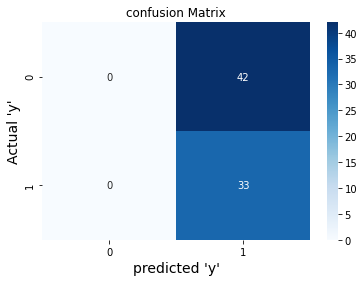

[SVC(C=1, class_weight='balanced', gamma=0.0001, probability=True,
    random_state=0), nan, nan, nan, nan, nan]
[0.44, 0.22, 0.5, 0.3055555555555556, 0.5]
gnb


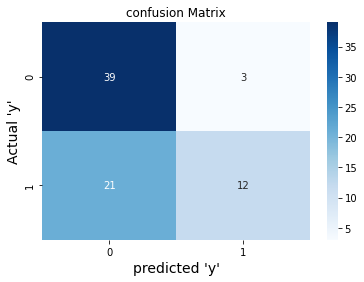

[GaussianNB(var_smoothing=1.0), nan, nan, nan, nan, nan]
[0.68, 0.7250000000000001, 0.6461038961038961, 0.6323529411764707, 0.6461038961038962]
lr


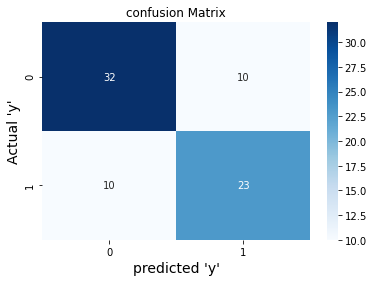

[LogisticRegression(C=1, class_weight='balanced', max_iter=500, penalty='l1',
                   random_state=0, solver='liblinear'), nan, nan, nan, nan, nan]
[0.7333333333333333, 0.7294372294372294, 0.7294372294372294, 0.7294372294372294, 0.7294372294372293]
dt


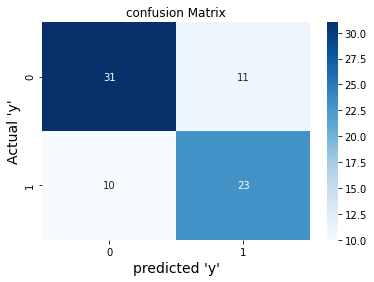

[DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                       min_samples_split=5, random_state=0), nan, nan, nan, nan, nan]
[0.72, 0.716284074605452, 0.7175324675324676, 0.7167775579931668, 0.7175324675324676]
rf


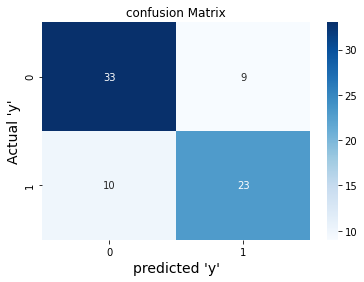

[RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=0), nan, nan, nan, nan, nan]
[0.7466666666666667, 0.7430959302325582, 0.7413419913419914, 0.7420814479638009, 0.7413419913419913]
svc 

mean values
0.7462739928843242
0.7656146883682982
0.7462739928843242
0.7656146883682982
0.7267046694165613
gnb 

mean values
0.6783031929369678
0.7378208792253986
0.6783031929369678
0.7378208792253986
0.6439795935387499
lr 

mean values
0.7269633755294359
0.7254779928640274
0.7269633755294359
0.7254779928640274
0.7238375100521157
rf 

mean values
0.7559742775658544
0.7559488755873744
0.7559742775658544
0.7559488755873744
0.7495634644943463
dt 

mean values
0.7475788258354538
0.7460820875804658
0.7475788258354538
0.7460820875804658
0.7420420339828622
+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+--------------

ValueError: I/O operation on closed file.

In [98]:
def standarize(X_train,X_test):
    X_train_num=X_train[list(X_train.columns.values[0:1])]
    X_train_cat=X_train[list(X_train.columns.values[1:])]
    #labels=list(X_train['Diagnosed'])


    X_test_num=X_test[list(X_test.columns.values[0:1])]
    X_test_cat=X_test[list(X_test.columns.values[1:])]
    #labels=list(X_test['Diagnosed'])

    st_scale=StandardScaler().fit(X_train_num)
    X_train_num=pd.DataFrame(st_scale.transform(X_train_num), index=X_train_num.index, columns=X_train_num.columns)
    X_test_num=pd.DataFrame(st_scale.transform(X_test_num), index=X_test_num.index, columns=X_test_num.columns)

    X_train=pd.concat([X_train_num,X_train_cat],axis=1)
    X_test=pd.concat([X_test_num,X_test_cat],axis=1)
    return X_train,X_test

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score,average='macro'),'Precision':make_scorer(precision_score,average='macro'),'Recall':make_scorer(recall_score,average='macro'),'F1 Score':make_scorer(f1_score,average='macro'),'AUC':make_scorer(roc_auc_score,average='macro')}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_sel_data_sg.csv')
data=df[generic+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
X_train,X_test=standarize(X_train,X_test)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        


import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='macro'))
        rec_stats.append(recall_score(Y_test, predictions,average='macro'))
        f1_stats.append(f1_score(Y_test, predictions,average='macro'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='macro'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    print('mean values')
    print(np.mean(acc_stats))
    print(np.mean(pre_stats))
    print(np.mean(acc_stats))
    print(np.mean(pre_stats))
    print(np.mean(auc_stats))
    
from prettytable import PrettyTable
#generic
x = PrettyTable()
x.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
x.add_row(['Naive Bayes']+stats_dict['gnb'])
x.add_row(['Decison Tree']+stats_dict['dt'])
x.add_row(['Random Forest']+stats_dict['rf'])
x.add_row(['Logistic Regression']+stats_dict['lr'])
x.add_row(['SVM']+stats_dict['svc'])
print(x)

data = x.get_string()

with open('../dataset/combined_ptable.txt', 'w') as f:
    f.write(data)
f.write('\nGeneric\n\n\n\n')

In [99]:
with open('../dataset/combined_ptable.txt', 'a+') as f:
    f.write('\nGeneric\n\n\n\n')

In [15]:
print(cv_dict[mt])
print(test_dict[mt])

[RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0), 0.7810084033613446, 0.8052470405411583, 0.7125, 0.7496356396964916, 0.7755482456140352]
[0.6666666666666666, 0.6659399224806202, 0.6666666666666666, 0.6652280764850447, 0.6625]


In [22]:
np.shape(data.values)
len(data)

249

In [86]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='weighted'))
        rec_stats.append(recall_score(Y_test, predictions,average='weighted'))
        f1_stats.append(f1_score(Y_test, predictions,average='weighted'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='weighted'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    

svc 

gnb 99

lr 999

rf 999

dt 999



In [87]:
from prettytable import PrettyTable
#generic
x = PrettyTable()
x.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
x.add_row(['Naive Bayes']+stats_dict['gnb'])
x.add_row(['Decison Tree']+stats_dict['dt'])
x.add_row(['Random Forest']+stats_dict['rf'])
x.add_row(['Logistic Regression']+stats_dict['lr'])
x.add_row(['SVM']+stats_dict['svc'])
print(x)

+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+---------------------+----------------+----------------+----------------+----------------+----------------+
|     Naive Bayes     | (63.45, 77.18) | (63.87, 77.72) | (63.45, 77.18) | (61.35, 76.9)  | (61.4, 76.21)  |
|     Decison Tree    | (60.66, 79.86) | (62.17, 79.83) | (60.66, 79.86) | (58.91, 79.81) | (59.67, 79.48) |
|    Random Forest    | (70.27, 80.0)  | (70.63, 80.2)  | (70.27, 80.0)  | (70.04, 79.93) | (69.56, 79.35) |
| Logistic Regression | (66.44, 78.17) | (66.59, 78.32) | (66.44, 78.17) | (66.37, 78.13) | (65.98, 77.82) |
|         SVM         | (68.71, 78.87) | (69.03, 78.96) | (68.71, 78.87) | (68.77, 78.81) | (68.13, 78.35) |
+---------------------+----------------+----------------+----------------+----------------+----------------+


In [89]:
data = x.get_string()

with open('../dataset/generic_ptable.txt', 'w') as f:
    f.write(data)

### Smell Test

Automatically created module for IPython interactive environment
svc


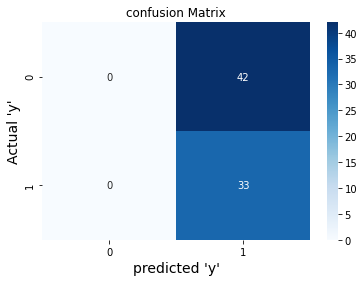

[SVC(C=1, class_weight='balanced', gamma=0.0001, probability=True,
    random_state=0), nan, nan, nan, nan, nan]
[0.44, 0.22, 0.5, 0.3055555555555556, 0.5]
gnb


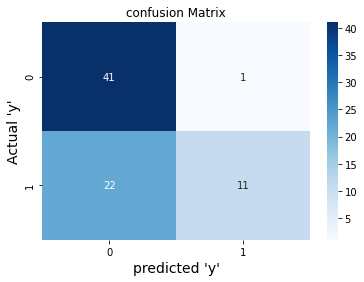

[GaussianNB(var_smoothing=1.0), nan, nan, nan, nan, nan]
[0.6933333333333334, 0.7837301587301587, 0.6547619047619048, 0.6349206349206349, 0.6547619047619047]
lr


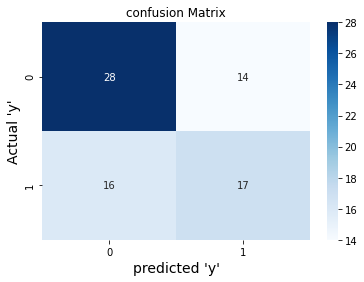

[LogisticRegression(C=1, class_weight='balanced', max_iter=500, penalty='l1',
                   random_state=0, solver='liblinear'), nan, nan, nan, nan, nan]
[0.6, 0.5923753665689149, 0.5909090909090908, 0.5912063953488371, 0.5909090909090909]
dt


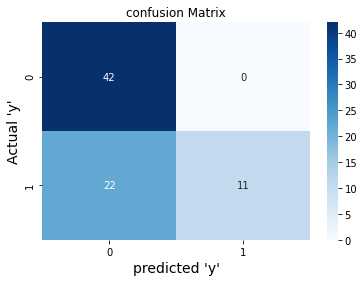

[DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                       min_samples_split=5, random_state=0), nan, nan, nan, nan, nan]
[0.7066666666666667, 0.828125, 0.6666666666666666, 0.6462264150943396, 0.6666666666666666]
rf


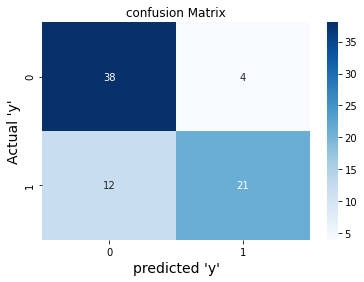

[RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=0), nan, nan, nan, nan, nan]
[0.7866666666666666, 0.8, 0.7705627705627706, 0.775112443778111, 0.7705627705627704]
svc 

mean values
0.7154217416153574
0.7301693847646872
0.7154217416153574
0.7301693847646872
0.6758177686258796
gnb 

mean values
0.7293491940427832
0.7775243007360291
0.7293491940427832
0.7775243007360291
0.6815279591010929
lr 

mean values
0.6372360411444999
0.6349900689160763
0.6372360411444999
0.6349900689160763
0.6358115378584226
rf 

mean values
0.8026191555637741
0.8030680461897721
0.8026191555637741
0.8030680461897721
0.7891657978036563
dt 

mean values
0.7345536185444327
0.7991905874538779
0.7345536185444327
0.7991905874538779
0.684236067102668
+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+---------------------+---------

In [100]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score,average='macro'),'Precision':make_scorer(precision_score,average='macro'),'Recall':make_scorer(recall_score,average='macro'),'F1 Score':make_scorer(f1_score,average='macro'),'AUC':make_scorer(roc_auc_score,average='macro')}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_sel_data_sg.csv')
data=df[smell+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
#X_train,X_test=standarize(X_train,X_test)
st_scale=StandardScaler().fit(X_train)
X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        
        st_scale=StandardScaler().fit(X_train)
        X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        #X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='macro'))
        rec_stats.append(recall_score(Y_test, predictions,average='macro'))
        f1_stats.append(f1_score(Y_test, predictions,average='macro'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='macro'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    

    print('mean values')
    print(np.mean(acc_stats))
    print(np.mean(pre_stats))
    print(np.mean(acc_stats))
    print(np.mean(pre_stats))
    print(np.mean(auc_stats))
    

from prettytable import PrettyTable
#generic
y = PrettyTable()
y.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
y.add_row(['Naive Bayes']+stats_dict['gnb'])
y.add_row(['Decison Tree']+stats_dict['dt'])
y.add_row(['Random Forest']+stats_dict['rf'])
y.add_row(['Logistic Regression']+stats_dict['lr'])
y.add_row(['SVM']+stats_dict['svc'])
print(y)
data = y.get_string()

with open('../dataset/combined_ptable.txt', 'a+') as f:
    f.write(data)
    f.write('\nSmell\n\n\n\n')

### Taste Test

Automatically created module for IPython interactive environment
svc


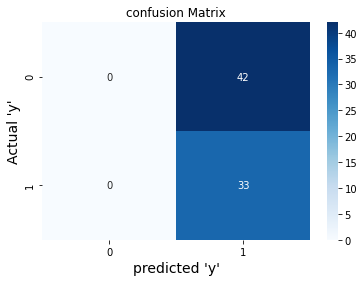

[SVC(C=1, class_weight='balanced', gamma=0.0001, probability=True,
    random_state=0), nan, nan, nan, nan, nan]
[0.44, 0.22, 0.5, 0.3055555555555556, 0.5]
gnb


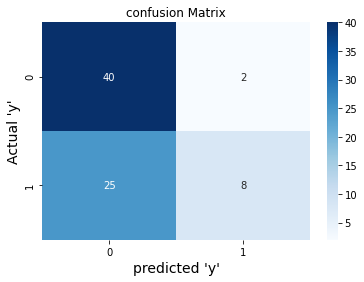

[GaussianNB(var_smoothing=1.0), nan, nan, nan, nan, nan]
[0.64, 0.7076923076923077, 0.5974025974025974, 0.5598782873288416, 0.5974025974025974]
lr


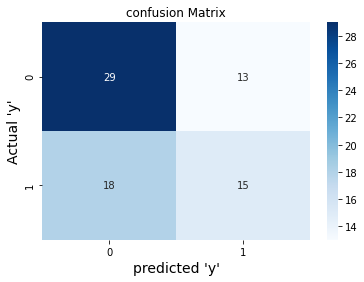

[LogisticRegression(C=1, class_weight='balanced', max_iter=500, penalty='l1',
                   random_state=0, solver='liblinear'), nan, nan, nan, nan, nan]
[0.5866666666666667, 0.5763677811550152, 0.5725108225108225, 0.5717443359734758, 0.5725108225108225]
dt


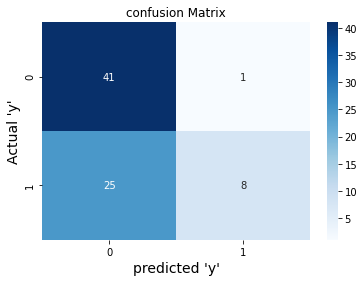

[DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                       min_samples_split=5, random_state=0), nan, nan, nan, nan, nan]
[0.6533333333333333, 0.755050505050505, 0.6093073593073592, 0.5701058201058201, 0.6093073593073594]
rf


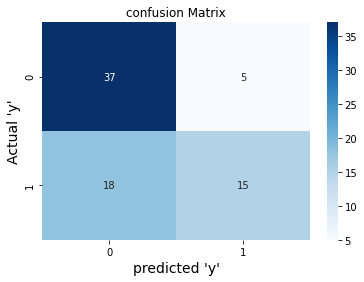

[RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=0), nan, nan, nan, nan, nan]
[0.6933333333333334, 0.7113636363636364, 0.6677489177489178, 0.6644621668936004, 0.6677489177489176]
svc 

mean values
0.6401144067982766
0.6790801087354394
0.6401144067982766
0.6790801087354394
0.5987021704552901
gnb 

mean values
0.6441983481355561
0.6860856002253831
0.6441983481355561
0.6860856002253831
0.6047896939164992
lr 

mean values
0.5293227921956375
0.526115409263654
0.5293227921956375
0.526115409263654
0.5261522613766776
rf 

mean values
0.6665424935999716
0.6654694564931701
0.6665424935999716
0.6654694564931701
0.6544778209150743
dt 

mean values
0.6340585243427195
0.6962464108285233
0.6340585243427195
0.6962464108285233
0.5924477066196844
+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+----------------

In [101]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score,average='macro'),'Precision':make_scorer(precision_score,average='macro'),'Recall':make_scorer(recall_score,average='macro'),'F1 Score':make_scorer(f1_score,average='macro'),'AUC':make_scorer(roc_auc_score,average='macro')}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_sel_data_sg.csv')
data=df[taste+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
#X_train,X_test=standarize(X_train,X_test)
st_scale=StandardScaler().fit(X_train)
X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        
        st_scale=StandardScaler().fit(X_train)
        X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        #X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='macro'))
        rec_stats.append(recall_score(Y_test, predictions,average='macro'))
        f1_stats.append(f1_score(Y_test, predictions,average='macro'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='macro'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    
    print('mean values')
    print(np.mean(acc_stats))
    print(np.mean(pre_stats))
    print(np.mean(acc_stats))
    print(np.mean(pre_stats))
    print(np.mean(auc_stats))
    


from prettytable import PrettyTable
#generic
z = PrettyTable()
z.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
z.add_row(['Naive Bayes']+stats_dict['gnb'])
z.add_row(['Decison Tree']+stats_dict['dt'])
z.add_row(['Random Forest']+stats_dict['rf'])
z.add_row(['Logistic Regression']+stats_dict['lr'])
z.add_row(['SVM']+stats_dict['svc'])
print(z)
data = z.get_string()

with open('../dataset/combined_ptable.txt', 'a+') as f:
    f.write(data)
    f.write('\nTaste\n\n\n')

### Taste+Smell

Automatically created module for IPython interactive environment
svc


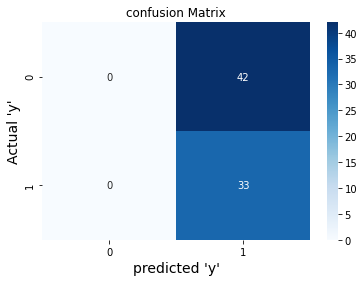

[SVC(C=1, class_weight='balanced', gamma=0.0001, probability=True,
    random_state=0), nan, nan, nan, nan, nan]
[0.44, 0.22, 0.5, 0.3055555555555556, 0.5]
gnb


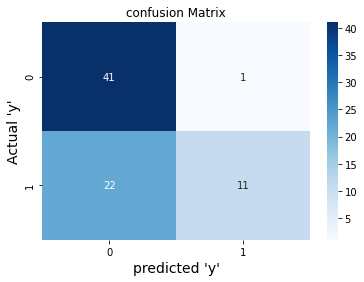

[GaussianNB(var_smoothing=1.0), nan, nan, nan, nan, nan]
[0.6933333333333334, 0.7837301587301587, 0.6547619047619048, 0.6349206349206349, 0.6547619047619047]
lr


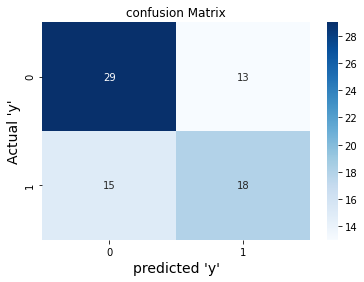

[LogisticRegression(C=1, class_weight='balanced', max_iter=500, penalty='l1',
                   random_state=0, solver='liblinear'), nan, nan, nan, nan, nan]
[0.6266666666666667, 0.6198680351906158, 0.6179653679653679, 0.6184593023255813, 0.6179653679653679]
dt


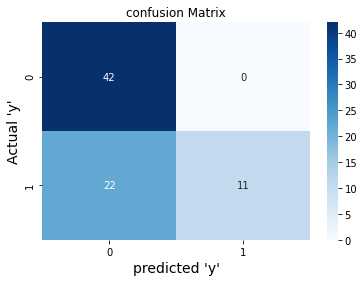

[DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                       min_samples_split=5, random_state=0), nan, nan, nan, nan, nan]
[0.7066666666666667, 0.828125, 0.6666666666666666, 0.6462264150943396, 0.6666666666666666]
rf


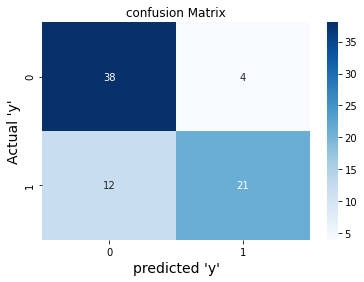

[RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=0), nan, nan, nan, nan, nan]
[0.7866666666666666, 0.8, 0.7705627705627706, 0.775112443778111, 0.7705627705627704]
svc 

mean values
0.6781934950283537
0.7191019974019446
0.6781934950283537
0.7191019974019446
0.6374011467911951
gnb 

mean values23259403424665682714907
0.6944416506791956
0.748891090517161
0.6944416506791956
0.748891090517161
0.6541283542337494
lr 

mean values
0.6157027710325611
0.6117447906947607
0.6157027710325611
0.6117447906947607
0.6103606904656109
rf 

mean values
0.7615492536037023
0.7654737586737036
0.7615492536037023
0.7654737586737036
0.7476451296271769
dt 

mean values4940
0.7071134756674994
0.7822561557373985
0.7071134756674994
0.7822561557373985
0.6642413421696097
+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+-----

In [102]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score,average='macro'),'Precision':make_scorer(precision_score,average='macro'),'Recall':make_scorer(recall_score,average='macro'),'F1 Score':make_scorer(f1_score,average='macro'),'AUC':make_scorer(roc_auc_score,average='macro')}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_sel_data_sg.csv')
data=df[smell+taste+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
#X_train,X_test=standarize(X_train,X_test)
st_scale=StandardScaler().fit(X_train)
X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        
        st_scale=StandardScaler().fit(X_train)
        X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
        X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        #X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='macro'))
        rec_stats.append(recall_score(Y_test, predictions,average='macro'))
        f1_stats.append(f1_score(Y_test, predictions,average='macro'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='macro'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    
    print('mean values')
    print(np.mean(acc_stats))
    print(np.mean(pre_stats))
    print(np.mean(acc_stats))
    print(np.mean(pre_stats))
    print(np.mean(auc_stats))
    


from prettytable import PrettyTable
#generic
w = PrettyTable()
w.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
w.add_row(['Naive Bayes']+stats_dict['gnb'])
w.add_row(['Decison Tree']+stats_dict['dt'])
w.add_row(['Random Forest']+stats_dict['rf'])
w.add_row(['Logistic Regression']+stats_dict['lr'])
w.add_row(['SVM']+stats_dict['svc'])
print(w)
data = w.get_string()

with open('../dataset/combined_ptable.txt', 'a+') as f:
    f.write(data)
    f.write('\nSmell+Taste\n\n\n')

### Generic+Smell+Taste

Automatically created module for IPython interactive environment
svc


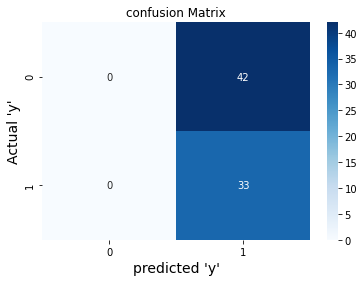

[SVC(C=1, class_weight='balanced', gamma=0.0001, probability=True,
    random_state=0), nan, nan, nan, nan, nan]
[0.44, 0.22, 0.5, 0.3055555555555556, 0.5]
gnb


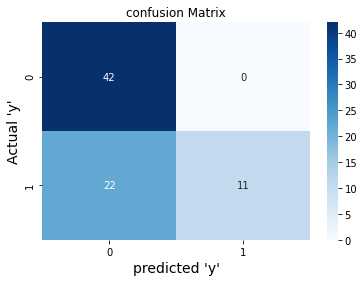

[GaussianNB(var_smoothing=1.0), nan, nan, nan, nan, nan]
[0.7066666666666667, 0.828125, 0.6666666666666666, 0.6462264150943396, 0.6666666666666666]
lr


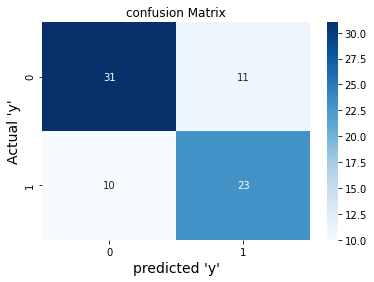

[LogisticRegression(C=1, class_weight='balanced', max_iter=500, penalty='l1',
                   random_state=0, solver='liblinear'), nan, nan, nan, nan, nan]
[0.72, 0.716284074605452, 0.7175324675324676, 0.7167775579931668, 0.7175324675324676]
dt


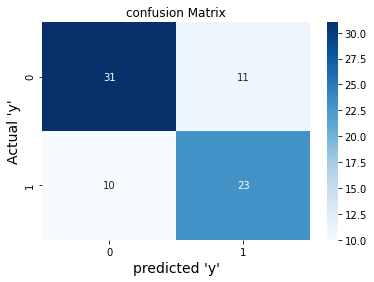

[DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                       min_samples_split=5, random_state=0), nan, nan, nan, nan, nan]
[0.72, 0.716284074605452, 0.7175324675324676, 0.7167775579931668, 0.7175324675324676]
rf


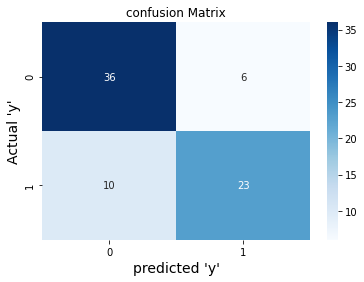

[RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=0), nan, nan, nan, nan, nan]
[0.7866666666666666, 0.787856071964018, 0.777056277056277, 0.7800586510263929, 0.7770562770562771]
svc 

mean values09210223418420504584594629634773783818827875885932997
0.6900551566659324
0.760750989807423
0.6900551566659324
0.760750989807423
0.650942524521792
gnb 

mean values
0.6906631785777488
0.7668134414340531
0.6906631785777488
0.7668134414340531
0.6512033006930492
lr 

mean values
0.7274532279433196
0.725504965975852
0.7274532279433196
0.725504965975852
0.7245323676774796
rf 

mean values
0.7728613235948462
0.7797169052806496
0.7728613235948462
0.7797169052806496
0.7597293438616491
dt 

mean values
0.740981530548486
0.7535253401194404
0.740981530548486
0.7535253401194404
0.7290516883170772
+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1

In [103]:
def standarize(X_train,X_test):
    X_train_num=X_train[list(X_train.columns.values[0:14])]
    X_train_cat=X_train[list(X_train.columns.values[14:])]
    #labels=list(X_train['Diagnosed'])


    X_test_num=X_test[list(X_test.columns.values[0:14])]
    X_test_cat=X_test[list(X_test.columns.values[14:])]
    #labels=list(X_test['Diagnosed'])

    st_scale=StandardScaler().fit(X_train_num)
    X_train_num=pd.DataFrame(st_scale.transform(X_train_num), index=X_train_num.index, columns=X_train_num.columns)
    X_test_num=pd.DataFrame(st_scale.transform(X_test_num), index=X_test_num.index, columns=X_test_num.columns)

    X_train=pd.concat([X_train_num,X_train_cat],axis=1)
    X_test=pd.concat([X_test_num,X_test_cat],axis=1)
    return X_train,X_test

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score,average='macro'),'Precision':make_scorer(precision_score,average='macro'),'Recall':make_scorer(recall_score,average='macro'),'F1 Score':make_scorer(f1_score,average='macro'),'AUC':make_scorer(roc_auc_score,average='macro')}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_sel_data_sg.csv')
data=df[smell+taste+generic+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
X_train,X_test=standarize(X_train,X_test)
#st_scale=StandardScaler().fit(X_train)
#X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
#X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        
        #st_scale=StandardScaler().fit(X_train)
        #X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
        #X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='macro'))
        rec_stats.append(recall_score(Y_test, predictions,average='macro'))
        f1_stats.append(f1_score(Y_test, predictions,average='macro'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='macro'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    

    print('mean values')
    print(np.mean(acc_stats))
    print(np.mean(pre_stats))
    print(np.mean(acc_stats))
    print(np.mean(pre_stats))
    print(np.mean(auc_stats))
    

from prettytable import PrettyTable
#generic
v = PrettyTable()
v.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
v.add_row(['Naive Bayes']+stats_dict['gnb'])
v.add_row(['Decison Tree']+stats_dict['dt'])
v.add_row(['Random Forest']+stats_dict['rf'])
v.add_row(['Logistic Regression']+stats_dict['lr'])
v.add_row(['SVM']+stats_dict['svc'])
print(v)

data=v.get_string()
with open('../dataset/combined_ptable.txt', 'a+') as f:
    f.write(data)
    f.write('\nGen+Smell+Taste\n\n\n')

In [94]:
data=x.get_string()
with open('../dataset/taste_smell_gen_ptable.txt', 'w') as f:
    f.write(data)

In [31]:
generic0=['No_smoke',
       'Prefer_not_to_say_smoke', 'Yes_current_smoker', 'Yes_former smoker',
       'contact_11_20', 'contact_21_50', 'contact_5_10',
       'contact_less_5', 'contact_greater_50', 'contacts_none', 'Female',
       'Seasonal allergies/hay fever', 'smell_disorder', 'taste_disorder',
       'no_comorbity', 'Diabetes (high blood sugar)', 'Obesity',
       'Chronic sinus problems', 'Other', 'High blood pressure', 'Head trauma',
       'Dry mouth', 'Heart disease (heart attack)',
       'Lung disease (asthma/COPD)', 'Neurological disease', 'Fever',
       'Changes in food flavor', 'Changes in smell', 'Changes in taste',
       'Headache', 'Fatigue', 'Body aches', 'Nausea', 'No symptoms',
       'Runny nose', 'Cough with mucus', 'Dry cough', 'Sore throat',
       'Skin sensitivity', 'Abdominal pain', 'Chest tightness', 'Diarrhea',
       'dry_mouth_com', 'Loss of appetite', 'difficult_breathing']

In [32]:
print(len(generic0),len(generic),len(smell),len(taste),len(generic+smell+taste))

45 54 8 5 67


Automatically created module for IPython interactive environment
svc


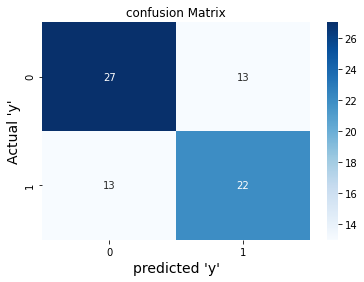

[SVC(C=100, class_weight='balanced', gamma=0.001, probability=True,
    random_state=0), 0.7411764705882353, 0.7383559577677224, 0.6875, 0.7079721887743874, 0.736732456140351]
[0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.6517857142857144]
gnb


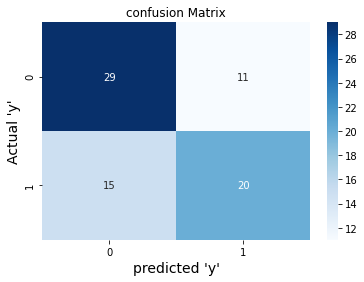

[GaussianNB(var_smoothing=1.0), 0.7636974789915967, 0.7821245421245421, 0.675, 0.7240637745643308, 0.7570906432748538]
[0.6533333333333333, 0.6525904203323557, 0.6533333333333333, 0.651082251082251, 0.6482142857142856]
lr


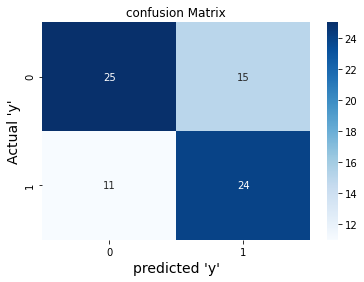

[LogisticRegression(C=1, class_weight='balanced', max_iter=500, random_state=0,
                   solver='liblinear'), 0.7468907563025211, 0.7267686561804209, 0.725, 0.7226012662118139, 0.7449561403508772]
[0.6533333333333333, 0.6575498575498576, 0.6533333333333333, 0.6535798956851588, 0.6553571428571429]
dt


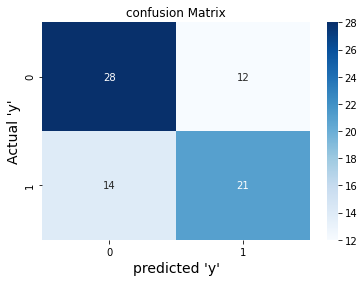

[DecisionTreeClassifier(class_weight='balanced', max_depth=1,
                       min_samples_split=5, random_state=0), 0.7870588235294118, 0.7899793601651186, 0.7375, 0.7566568914956012, 0.7827850877192983]
[0.6533333333333333, 0.6525252525252525, 0.6533333333333333, 0.6524629363940697, 0.6499999999999999]
rf


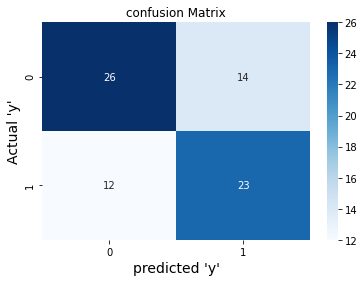

[RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_samples_split=5, n_estimators=200,
                       random_state=0), 0.7642016806722689, 0.7707843137254903, 0.7, 0.7292975841362939, 0.7590643274853802]
[0.6533333333333333, 0.6550023707918444, 0.6533333333333333, 0.6537037037037038, 0.6535714285714286]
svc 

gnb 991298

lr 999409

rf 999

dt 999

+---------------------+----------------+----------------+----------------+----------------+----------------+
|        Model        |    Accuracy    |   Precision    |     Recall     |    F1 Score    |      Auc       |
+---------------------+----------------+----------------+----------------+----------------+----------------+
|     Naive Bayes     | (56.56, 75.0)  | (59.5, 76.03)  | (56.56, 75.0)  | (51.07, 74.95) | (55.76, 74.54) |
|     Decison Tree    | (54.1, 77.12)  | (57.88, 77.24) | (54.1, 77.12)  | (50.81, 77.07) | (54.57, 77.01) |
|    Random Forest    | (63.2, 76.16)  

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import numpy as np
np.random.seed(0)
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,make_scorer,precision_score,recall_score
print(__doc__)
cv_dict={}
test_dict={}

# Choose cross-validation techniques for the inner and outer loops,
# independently of the dataset.

# E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.

scoring={'Accuracy':make_scorer(accuracy_score),'Precision':make_scorer(precision_score),'Recall':make_scorer(recall_score),'F1 Score':make_scorer(f1_score),'AUC':make_scorer(roc_auc_score)}

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

mts=['svc','gnb','lr','dt','rf']
# Set up possible values of parameters to optimize over
p_grids=[[] for i in range(5)]
p_grids[0] = {"C": [1, 10, 100, 1000, 10000],"gamma": [.0001, .001, .01, .1, .2, .5]}
p_grids[1]={'var_smoothing': np.logspace(0,-9, num=100)}
p_grids[2]={"C": [1, 10, 100, 1000, 10000],"fit_intercept":[True,False],"penalty":['l1', 'l2']}
p_grids[3]={'criterion':['gini','entropy'],'max_depth':  [1, 5, 10, 50], "min_samples_split": [5, 10, 100, 500]}
p_grids[4] = { 'n_estimators': [100,200],'max_features': ['auto', 'sqrt', 'log2'],'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10],'criterion' :['gini', 'entropy']}
#p_grids[5]= {'max_depth':  [4,5,6,7,8], "n_estimators": [10, 20,50,70,100,150] }
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
#p_grids[6] = dict(n_neighbors=k_range, weights=weight_options)
#p_grid = {"loss":["deviance"],"learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],"min_samples_split": np.linspace(0.1, 0.5, 12),"min_samples_leaf": np.linspace(0.1, 0.5, 12),"max_depth":[3,5,8],"max_features":["log2","sqrt"],"criterion": ["friedman_mse",  "mae"],"subsample":[0.5, 0.8, 0.85, 0.9, 0.95, 1.0],"n_estimators":[10]}

# ML model
models=[[] for i in range(5)]
models[0] = SVC(kernel="rbf",random_state=0,class_weight='balanced',probability=True)
models[1]=GaussianNB()
models[2]=LogisticRegression(random_state=0,solver='liblinear',max_iter=500,class_weight='balanced')
models[3]=DecisionTreeClassifier(random_state=0,class_weight='balanced')
models[4]=RandomForestClassifier(random_state=0,class_weight='balanced')
#models[5]=XGBClassifier(random_state=0,class_weight='balanced',probability=True)
#models[6]=KNeighborsClassifier()
#model=GradientBoostingClassifier(random_state=0)

#data=pd.read_csv('../dataset/covid_survey_sel_data_sg.csv')
data=df[generic0+label]
values=data.values
X=data.iloc[:, 0 : -1]
Y=list(values[:,-1])
Y=[0 if val=='Non-COVID' else 1 for val in Y]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y,  random_state = 0,test_size = 0.3)
#X_train,X_test=standarize(X_train,X_test)
#st_scale=StandardScaler().fit(X_train)
#X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
#X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

for i in range(5):
    mt=mts[i]
    print(mt)
    p_grid=p_grids[i]
    model=models[i]
    clf = GridSearchCV(estimator=model, param_grid=p_grid, cv=inner_cv,scoring=scoring,refit='AUC')
    clf.fit(X_train, Y_train)

    # Nested CV with parameter optimization
    nested_cvscore = cross_validate(clf, X=X_train, y=Y_train, cv=outer_cv,scoring=scoring)
    cv_dict[mt]=[clf.best_estimator_,nested_cvscore['test_Accuracy'].mean(),nested_cvscore['test_Precision'].mean(),nested_cvscore['test_Recall'].mean(),nested_cvscore['test_F1 Score'].mean(),nested_cvscore['test_AUC'].mean()]


    model=cv_dict[mt][0]
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(Y_test,Y_pred)

    import seaborn as sns
    import matplotlib.pyplot as plt     

    sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
    plt.title('confusion Matrix')
    plt.ylabel("Actual 'y'", fontdict= {'fontsize' : 14})
    plt.xlabel("predicted 'y'", fontdict= {'fontsize' : 14})
    plt.show()

    test_dict[mt]=evaluation_metrics(Y_test,Y_pred)
    #evaluation_metrics(Y_test,Y_pred)
    print(cv_dict[mt])
    print(test_dict[mt])

#     import pickle
#     with open('../dataset/cv_dict_sel_pstd_t','wb') as f:
#         pickle.dump(cv_dict,f)
#     with open('../dataset/test_dict_sel_pstd_t','wb') as f:
#         pickle.dump(test_dict,f)
        
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load dataset
#data = read_csv('../dataset/covid_survey_data40.csv')
#values = data.values[:,1:]
values=data.values
# configure bootstrap
n_iterations = 1000
n_size = int(len(data) * 0.50)
clfs=['svc','gnb','lr','rf','dt']
stats_dict = {}
# with open('../dataset/cv_dict_sel_pstd_t','rb') as f:
#     cv_dict=pickle.load(f)
for i in range(5):
    clf=clfs[i]
    print(clf,'\n')
    # run bootstrap
    acc_stats = []
    pre_stats = []
    rec_stats = []
    f1_stats = []
    auc_stats = []
    for i in range(n_iterations):
        print('i=',i,end='\r')
        # prepare train and test sets
        train = resample(values, stratify=values[:,-1],n_samples=n_size)
        test = numpy.array([x for x in values if x.tolist() not in train.tolist()])
        train[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(train[:,-1])])
        test[:,-1]=np.array([0 if val=='Non-COVID' else 1 for val in list(test[:,-1])])
        X_train=pd.DataFrame(train[:,:-1])
        #X_train.columns=colnames[:-1]
        X_test=pd.DataFrame(test[:,:-1])
        #X_test.columns=colnames[:-1]
        
        #st_scale=StandardScaler().fit(X_train)
        #X_train=pd.DataFrame(st_scale.transform(X_train), index=X_train.index, columns=X_train.columns)
        #X_test=pd.DataFrame(st_scale.transform(X_test), index=X_test.index, columns=X_test.columns)

        Y_train=list(train[:,-1])
        Y_test=list(test[:,-1])
        #X_train,X_test=standarize(X_train,X_test)
        # fit model
        model = cv_dict[clf][0]
        model.fit(X_train, Y_train)
        # evaluate model
        predictions = model.predict(X_test)
        acc_stats.append(accuracy_score(Y_test, predictions))
        pre_stats.append(precision_score(Y_test, predictions,average='weighted'))
        rec_stats.append(recall_score(Y_test, predictions,average='weighted'))
        f1_stats.append(f1_score(Y_test, predictions,average='weighted'))
        #atest=[0 if val=='Non-COVID' else 1 for val in list(Y_test)]
        #apred=[0 if val=='Non-COVID' else 1 for val in list(predictions)]
        auc_stats.append(roc_auc_score(Y_test, predictions,average='weighted'))
        #print('i=',i,' score=',score,' train shape= ',np.shape(train),' test shape= ',np.shape(test),' train ratio=',list(train[:,-1]).count('Non-COVID')/list(train[:,-1]).count('Positive'),' test_ratio=',list(test[:,-1]).count('Non-COVID')/list(test[:,-1]).count('Positive'),end='\r')
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100
    acc_lower = max(0.0, numpy.percentile(acc_stats, p))
    pre_lower = max(0.0, numpy.percentile(pre_stats, p))
    rec_lower = max(0.0, numpy.percentile(rec_stats, p))
    f1_lower = max(0.0, numpy.percentile(f1_stats, p))
    auc_lower = max(0.0, numpy.percentile(auc_stats, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    acc_upper = min(1.0, numpy.percentile(acc_stats, p))
    pre_upper = min(1.0, numpy.percentile(pre_stats, p))
    rec_upper = min(1.0, numpy.percentile(rec_stats, p))
    f1_upper = min(1.0, numpy.percentile(f1_stats, p))
    auc_upper = min(1.0, numpy.percentile(auc_stats, p))
    stats_dict[clf]=[(round(acc_lower*100,2),round(acc_upper*100,2)),(round(pre_lower*100,2),round(pre_upper*100,2)),(round(rec_lower*100,2),round(rec_upper*100,2)),(round(f1_lower*100,2),round(f1_upper*100,2)),(round(auc_lower*100,2),round(auc_upper*100,2))]
    #print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
# with open('../dataset/stats_sel_pstd_dict_t','wb') as f:
#     pickle.dump(stats_dict,f)
    


from prettytable import PrettyTable
#generic
x = PrettyTable()
x.field_names = [ "Model", 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Auc']
x.add_row(['Naive Bayes']+stats_dict['gnb'])
x.add_row(['Decison Tree']+stats_dict['dt'])
x.add_row(['Random Forest']+stats_dict['rf'])
x.add_row(['Logistic Regression']+stats_dict['lr'])
x.add_row(['SVM']+stats_dict['svc'])
print(x)



In [ ]:
df <- data.frame(id=LETTERS[1:4], min=c(13,15,23,2), max=c(20,30,40,11))
library(ggplot2)
ggplot(df, aes(x=id))+
geom_linerange(aes(ymin=min,ymax=max),linetype=2,color="blue")+
geom_point(aes(y=min),size=3,color="red")+
geom_point(aes(y=max),size=3,color="red")+
theme_bw()